# Velocity of a Toy Car Measured with Ultrasonic Motion Detector
##### By Reid Mumford and Liza Sazonova  (9/13/2018)
---

## Introduction



The goal is to measure the velocity of a toy truck. We are going to do this with a *Vernier* Ultrasonic Motion Detector. 

We know that (in the absence of acceleration),

$$ x(t) = v t + x_o$$

Assuming the truck doesn't accelerate, we can find its velocity by looking at the position of the truck at different times, and calculating the slope of the graph with position on the y-axis and time on the x-axis. To do this, we set up the experiment using a toy truck, a tape measure and Vernier motion detector.

## Setup 

 * Place the motion detector about 10 cm from the tape measure
 * Place the car with the tape between the wheels, to reduce the chance of the car going off-track. 
 * Connect the motion detector to the LabPro device


<img src = "images/DSC_0701.jpg" width=400 style="float:left; margin-right: 20px; transform: rotate(-90deg)">



## First Try

### Charging the Car
It seems that the speed of the car depends on how far the car is initially pulled back. 

To ensure a consistent velocity across trials: We decide to place the car 40 cm away from the edge of the table, and pull it backwards 40 cm to wind up the motor.  

### Data Collection
Then we start the motion detector and release the car. After the car has reached the other wall, we stop the LoggerPro measurement. Figure below shows the data that was collected in the LoggerPro software window:

<img src="images/screenshot1.png" width=800>

It looks like LoggerPro did not record the motion of the car; instead it recorded a constant position at 2.23 m. We guess that the detector misses the car since it is too much to the side, and measures the next closest object: the wall. We check this guess.

#### Measured distances
 * distance from the edge of table to the wall $ = 244.0 \pm 0.5 cm$ 
 * distance from the edge of table to front of motion detector $ = 17.0 \pm 0.5 cm$
 * calculated distance from detector to wall:

In [1]:
import numpy as np
dist_detector_wall = 244 - 17
dist_detector_wall_err = np.sqrt(2*(0.5**2))
print("Distance from the detector to the wall = %2.1f +/- %2.1f cm" %
     (dist_detector_wall, dist_detector_wall_err))

Distance from the detector to the wall = 227.0 +/- 0.7 cm


### Motion Detector Offset -- Possible Systematic Error 

#### Measured Distances to Wall
 * Logger Pro $=2.230 \pm 0.001 m$
 * Tape Measure $2.270 \pm 0.007 m$
 
The distance from the detector to the wall is 4 cm greater than the distance measured by Logger Pro. The significant discrepancy between the two measurements implies a systematic offset the measurements of the device.

## Moving Position of the Motion Detector

We moved the motion detector to rest on the tape measure for better alignment. 

We measured the length of the detector from the table edge again to obtain a more accurate estimate of the detector length, and we got

#### Measured Distances
distance from the edge of table to front of motion detector $= 16.7 \pm 0.1 cm$


<img src="images/DSC_0703.jpg" width=400 style="float: left; margin-right:20px; transform: rotate(90deg)"> 

## Trial 1: 
We pull the car back to the motion detector and start a new measurement. The position data on the LoggerPro preview looks clean. 
The car starts accelerating around 1s after LoggerPro is started, and moved with roughly constant velocity for about 2 seconds. It then stops as it hits the wall. 

### Observations: 
 * There is a small bump at $t\approx 1.6$ s, and we are not sure what caused it. 
 * There is also a strange spike in the velocity plot, shown below.

<img src="images/screenshot2.png" width=800>

### Spike Issue
The spike was caused when the motion detector misses the car for one data point.   We switched the detector to a lower sensitivity setting to try for cleaner data. 

### Range of the Motion Detector
We noticed that the initial position on the position graph reads $17$ cm, even though the car started directly in front of the detector. 

The range of the motion detector is listed in the user manual: https://www.vernier.com/files/manuals/md-btd/md-btd.pdf
The range is: 
$$ 0.17 m < r < 6.0 m$$

### Charging the Car -- New Procedure
Based on the limitation of the motion detector, we change our procedure slightly:
We now start the car at the $80$ cm mark (measured from the back bumper), and move it to the $40$ cm mark, then release.

The first two trials, the car went off track, so we decided to discard these. The next trial was successful and we obtained good quality data, shown below.

<img src="images/screenshot5.png" width=800>

## Investigating Systematic Position Offset

We still notice that the initial distance measurement is slightly higher than we expect. We can calculate by how much:

In [2]:
expected_x0 = 40 - 16.7
expected_x0_err = np.sqrt(0.2**2 + 0.1**1)
print("Expected starting position: %2.f +/- %2.1f cm" % (expected_x0, expected_x0_err))

Expected starting position: 23 +/- 0.4 cm


But the starting position measured by the detector is closer to 30 cm!?! 

We noticed that the back of the truck is actually lower than the motion detector -- is it possible the motion detector doesn't measure the back of the truck, but the passenger cabin?

We decide that it is better to use the cabin to track the position of the truck, and lower the trunk to further decrease interference from the back side. The figure below shows our new truck configuration:

Note, the distance between the rear bumper and the back of the cab is $\approx 5.0 \pm 0.2 \; cm$. 

<img src="images/DSC_0704.jpg">

The new procedure is to use the **back of the cab** (instead of the rear bumper) as the **reference point**. 
Since it is even more difficult to measure the position of the cab, we increase our position uncertainty to $0.5$ cm. We ran a test trial with this new set-up and obtained clean data with the zero position located roughly in the correct place, shown on the figure below!

It is safe to say that the motion detector is sensing the reflection from the back of the cab! 

<img src="images/screenshot6.png" width="800">

## Data Collection
We collected two more trials to get more than one measurement of velocity.

In [3]:
import pandas as pd 
data1 = pd.read_csv("data/data4.csv")
data2 = pd.read_csv("data/data5.csv")
data3 = pd.read_csv("data/data6.csv")

Look at one of the data files to make sure it was read in correctly:

In [4]:
data1.head()  # Looks at only the top 5 rows

,Time (s),Position (m),Velocity (m/s),Acceleration (m/s²)
0,0.05,0.228301,0.003964,-0.031725
1,0.10,0.228575,0.002210,-0.025441
2,0.15,0.228575,0.000823,-0.015524
3,0.20,0.228575,0.000610,-0.006276
4,0.25,0.228575,0.001220,-0.013271


It looks good! Now, we want to calculate the velocity from the part of the run where the car was actually moving with a constant speed and not accelerating. Looking at the plot above, it looks like the car was moving roughly constantly past $0.5$ cm, and until about $2$ m. We choose this region in all data files:

In [5]:
vel_data1 = data1[(data1["Position (m)"] > 0.5) & (data1["Position (m)"] < 2)]
vel_data2 = data2[(data2["Position (m)"] > 0.5) & (data2["Position (m)"] < 2)]
vel_data3 = data3[(data3["Position (m)"] > 0.5) & (data3["Position (m)"] < 2)]

To quickly make sure our selection makes sense, we plot the three runs and make sure the data is roughly linear. LoggerPro's uncertainties in time are negligible.  The uncertainty in position is determined by the resolution of the motion detector ($\pm 1mm$) it is safe to ignore the uncertainty in position. We use the `errorbar` plot with 0 uncertainties.

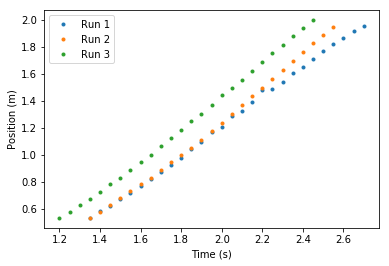

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.errorbar(vel_data1["Time (s)"], vel_data1["Position (m)"], fmt=".", label="Run 1")
plt.errorbar(vel_data2["Time (s)"], vel_data2["Position (m)"], fmt=".", label="Run 2")
plt.errorbar(vel_data3["Time (s)"], vel_data3["Position (m)"], fmt=".", label="Run 3")
plt.xlabel("Time (s)"); plt.ylabel("Position (m)"); plt.legend()

It looks like the selection is correct. Interestingly, we can immediately see that the slopes are slightly different between Runs 1 and 2, indicating a slightly different velocity, although this might not be a significant effect.

To get a numerical value for velocity, we fit a straight line to each of the data sets. We use a linear model:

In [7]:
def linear_model(x, A, B):
    y = A + B*x
    return y

We use SciPy's `curve_fit` function from the `optimize` toolbox to fit for parameters A and B and their associated uncertainties. Since LoggerPro's uncertainties are negligible, we do not specify the `sigma` and `absolute_sigma` parameters.

In [8]:
from scipy.optimize import curve_fit
import numpy as np

fit_values1, fit_cov1 = curve_fit(linear_model, vel_data1["Time (s)"], vel_data1["Position (m)"], p0=[0, 10])
fit_values2, fit_cov2 = curve_fit(linear_model, vel_data2["Time (s)"], vel_data2["Position (m)"], p0=[0, 10])
fit_values3, fit_cov3 = curve_fit(linear_model, vel_data3["Time (s)"], vel_data3["Position (m)"], p0=[0, 10])

A1 = fit_values1[0];  dA1 = np.sqrt(fit_cov1[0][0])
A2 = fit_values2[0];  dA2 = np.sqrt(fit_cov2[0][0])
A3 = fit_values3[0];  dA3 = np.sqrt(fit_cov3[0][0])

B1 = fit_values1[1];  dB1 = np.sqrt(fit_cov1[1][1])
B2 = fit_values2[1];  dB2 = np.sqrt(fit_cov2[1][1])
B3 = fit_values3[1];  dB3 = np.sqrt(fit_cov3[1][1])

As = [A1, A2, A3];   dAs = [dA1, dA2, dA3]
Bs = [B1, B2, B3];   dBs = [dB1, dB2, dB3]

print(Bs)  # these are the raw ave. velocity numbers

[1.0888933943633705, 1.1997950030384246, 1.195614742181144]


Now, we can find the average velocity and intercept from the three trials. Instead of using the uncertainties from the fit, we use the standard deviation of each parameter as its uncertainty.

In [9]:
A_avg = np.average(As);   dA_avg = np.std(As)
B_avg = np.average(Bs);   dB_avg = np.std(Bs)

print("Intercept: %2.2f +/- %2.2f m" % (A_avg, dA_avg))
print("Velocity: %2.2f +/- %2.2f m/s" % (B_avg, dB_avg))

Intercept: -1.02 +/- 0.09 m
Velocity: 1.16 +/- 0.05 m/s


So, the velocity of the toy car is **1.16 +/- 0.05 m/s**. The intercept is not consistent with 0, but it is to be expected, since the intercept corresponds to the position when t=0, but for all of the trials the car didn't start moving at t=0. Therefore, a negative intercept is to be expected.

## Results and Discussion

We have investigated the velocity of a toy truck using LoggerPro motion detector. 
 * We assumed that the car is moving with a constant speed, and its position is given as a function of time: $x(t) = vt + x_o$. 
 * We fit a linear model to the data we collected, $x = A + Bx$, and found the speed of the car from the slope of the linear fit for each trial. 
 * The linear model appears to describe the data well (see the plots below).  It seems that the constant velocity assumption is reasonable. 
 

Text(0.5,1,'3 Trials of a Toy Truck with Fit Lines')

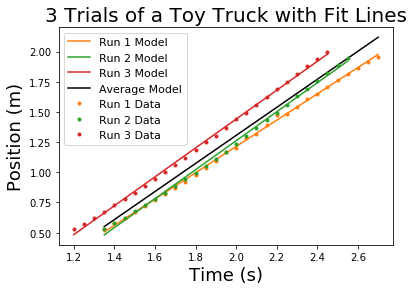

In [10]:
# plot all trials on one plot for comparison

# In the errorbar plot, color changes the color of the data. C1, C2, C3, ... are the default Python sequence of colors.
# Markersize controls the size of the data points.
plt.errorbar(vel_data1["Time (s)"], vel_data1["Position (m)"], fmt="o", label="Run 1 Data", color="C1", markersize=3)
plt.errorbar(vel_data2["Time (s)"], vel_data2["Position (m)"], fmt="o", label="Run 2 Data", color="C2", markersize=3)
plt.errorbar(vel_data3["Time (s)"], vel_data3["Position (m)"], fmt="o", label="Run 3 Data", color="C3", markersize=3)

plt.plot(vel_data1["Time (s)"], linear_model(vel_data1["Time (s)"], A1, B1), label="Run 1 Model", color="C1")
plt.plot(vel_data2["Time (s)"], linear_model(vel_data2["Time (s)"], A2, B2), label="Run 2 Model", color="C2")
plt.plot(vel_data3["Time (s)"], linear_model(vel_data3["Time (s)"], A3, B3), label="Run 3 Model", color="C3")

# In the regular plot, "k-" is the same format string as in the errorbar plot (fmt="k-") except you don't use the fmt keyword.
# It has to come right after the y-values are specified.
plt.plot(vel_data1["Time (s)"], linear_model(vel_data1["Time (s)"], A_avg, B_avg),  "k-", label="Average Model")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Position (m)", fontsize=18)
plt.legend(fontsize=11)
plt.title("3 Trials of a Toy Truck with Fit Lines",fontsize=20)

Our best estimate for the average velocity of the toy car is:

$$\boxed{\bar{v}=1.16 \pm 0.05 \textrm{ m/s}}$$

However, there is a considerable variation in the velocities of the car from one trial to another (on the order of 10%).  In partiular, trial 1 is more different than trials 2 and 3.  This could be because:
 * the car is extremely sensitive to the pull-back distance (we pulled the car back the same distance to within 2% each time.  It is hard to imagine that a 2% difference in pull-back distance results in a 10% effect in velocity!)
 * OR it could also be that the velocity of the toy car just isn't very reproducible.  
 
More trials would help narrow down the random error of our experiment.



In [13]:
vel_data1["dPosition (m)"] = 1e-3
vel_data1["dTime (s)"] = 1e-2

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
vel_data1

,Time (s),Position (m),Velocity (m/s),Acceleration (m/s²),dPosition (m),dTime (s)
26,1.35,0.531787,0.846981,1.057964,0.001,0.01
27,1.40,0.579533,0.888446,0.721824,0.001,0.01
28,1.45,0.622065,0.903843,0.637726,0.001,0.01
29,1.50,0.668164,0.945308,0.680156,0.001,0.01
30,1.55,0.717007,0.979456,0.613843,0.001,0.01
31,1.60,0.766399,1.009030,0.506031,0.001,0.01
32,1.65,0.818261,1.029000,0.444545,0.001,0.01
33,1.70,0.869848,1.044397,0.560741,0.001,0.01
34,1.75,0.921984,1.071532,0.910347,0.001,0.01
35,1.80,0.974394,1.150956,0.931351,0.001,0.01


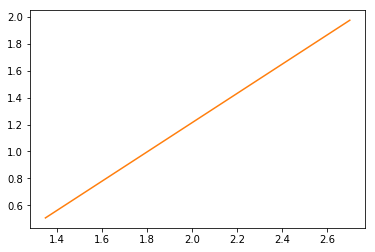

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.errorbar( vel_data1["Time (s)"], vel_data1["Position (m)"], 
#               xerr=vel_data1["dTime (s)"], yerr=vel_data1["dPosition (m)"],
#               fmt="o", label="Run 1 Data", color="C1", markersize=5)

plt.plot(vel_data1["Time (s)"], linear_model(vel_data1["Time (s)"], A1, B1), 
         "-", label="Run 1 Model", color="C1")

# plt.xlabel("Time (s)", fontsize=18)
# plt.ylabel("Position (m)", fontsize=18)
# plt.legend(fontsize=11)
# plt.title("3 Trials of a Toy Truck with Fit Lines",fontsize=20)

plt.savefig("output.png")

<ErrorbarContainer object of 3 artists>

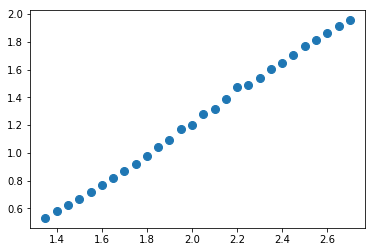

In [38]:
plt.errorbar( vel_data1["Time (s)"], vel_data1["Position (m)"], 
              #xerr=vel_data1["dTime (s)"], yerr=vel_data1["dPosition (m)"],
              fmt="o", label="Run 1 Data", markersize=8)